# Some Examples of Generated Degradaed Images

## Dataset: Caltech-256
Set of 256 object categories and 1 clutter category containing a total of 30607 images.
We select 60 images randomly as training images per class, and the rest are used for testing. Among the training images, 20% per class are used as a validation set.

In [6]:
DATA_DIR = "datasets/caltech256"

In [7]:
from data import Caltech256
caltech256_train = Caltech256(root=DATA_DIR, phase='train', download=True, is_return_origin=True)
caltech256_valid = Caltech256(root=DATA_DIR, phase='valid', download=True, is_return_origin=True)
caltech256_test = Caltech256(root=DATA_DIR, phase='test', download=True, is_return_origin=True)
print("Total number of train images: {}.".format(len(caltech256_train)))
print("Total number of valid images: {}.".format(len(caltech256_valid)))
print("Total number of test images: {}.".format(len(caltech256_test)))

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Total number of train images: 12336.
Total number of valid images: 3084.
Total number of test images: 15187.


## Example of clean images

Files already downloaded and verified
index=1139


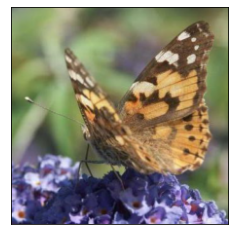

This image belong to category: butterfly.


In [8]:
from torchvision import transforms
import numpy as np
transform = transforms.Compose([
            transforms.Resize(224),
            transforms.CenterCrop(224),
            transforms.ToTensor()])
caltech256 = Caltech256(root=DATA_DIR, phase='train', download=True, transform=transform, is_return_origin=False)
index = np.random.randint(len(caltech256))
index = 1139
print('index=%d' % index)
image, label = caltech256[index]

import matplotlib.pyplot as plt
plt.imshow(image.permute(1, 2, 0).cpu().numpy())
plt.xticks([])
plt.yticks([])
plt.show()
print('This image belong to category: {}.'.format(caltech256.map[label]))

## Genearted synthetic images: additive white Gaussian noise

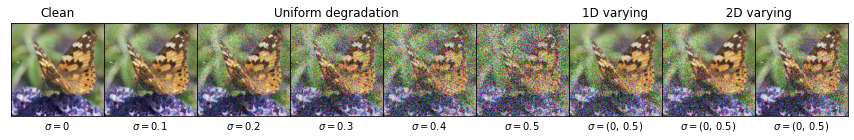

In [11]:
from degradation import AdditiveWhiteGaussianNoise
import os

plt.rcParams.update({'font.size': 10})

fig, ax = plt.subplots(1, 9, sharey=True, figsize=(15,10/5*4))
# clean images
ax[0].imshow(image.permute(1, 2, 0).cpu().numpy())
ax[0].set_title('Clean')
ax[0].set_xlabel('$\sigma=0$')

# uniform degraded
index = 1
for level in [0.1, 0.2, 0.3, 0.4, 0.5]:
    degraded = AdditiveWhiteGaussianNoise(level=level, vary='uniform')(image)[0]
    ax[index].imshow(degraded.permute(1, 2, 0).cpu().numpy())
    ax[index].set_xlabel('$\sigma=${}'.format(level))
    index += 1
ax[3].set_title('Uniform degradation')
    
# spatially varying
level = (0, 0.5)
vary = '1D'
degraded = AdditiveWhiteGaussianNoise(level=level, vary=vary)(image)[0]
ax[index].imshow(degraded.permute(1, 2, 0).cpu().numpy())
ax[index].set_title('{} varying'.format(vary))
ax[index].set_xlabel('$\sigma=${}'.format(level))
index += 1

vary = '2D'
for change in ['increase', 'decrease']:
    degraded = AdditiveWhiteGaussianNoise(level=level, vary=vary, change=change)(image)[0]
    ax[index].imshow(degraded.permute(1, 2, 0).cpu().numpy())
    ax[index].set_xlabel('$\sigma=${}'.format(level))
    index += 1
ax[7].set_title('                          2D varying')

for i in range(len(ax)):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.subplots_adjust(wspace=0.0)
plt.savefig(os.path.join('result', 'example-images.png'), bbox_inches='tight', dpi=300)
plt.show()

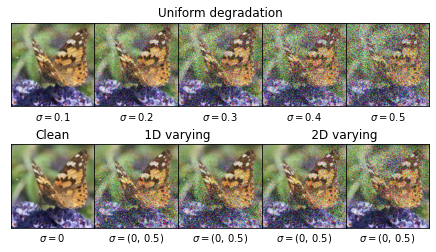

In [22]:
from degradation import AdditiveWhiteGaussianNoise
import os

plt.rcParams.update({'font.size': 10})

fig, ax = plt.subplots(2, 5, sharey=True, figsize=(15/2,4.1))

# uniform degraded
index = 0
for level in [0.1, 0.2, 0.3, 0.4, 0.5]:
    degraded = AdditiveWhiteGaussianNoise(level=level, vary='uniform')(image)[0]
    ax[0, index].imshow(degraded.permute(1, 2, 0).cpu().numpy())
    ax[0, index].set_xlabel('$\sigma=${}'.format(level))
    index += 1
ax[0, 2].set_title('Uniform degradation')

# clean images
ax[1, 0].imshow(image.permute(1, 2, 0).cpu().numpy())
ax[1, 0].set_title('Clean')
ax[1, 0].set_xlabel('$\sigma=0$')
    
# spatially varying
level = (0, 0.5)
vary = '1D'
index = 1
for _ in range(2):
    degraded = AdditiveWhiteGaussianNoise(level=level, vary=vary)(image)[0]
    ax[1, index].imshow(degraded.permute(1, 2, 0).cpu().numpy())
    ax[1, index].set_xlabel('$\sigma=${}'.format(level))
    index += 1
ax[1, 1].set_title('                     1D varying')
    
vary = '2D'
for change in ['increase', 'decrease']:
    degraded = AdditiveWhiteGaussianNoise(level=level, vary=vary, change=change)(image)[0]
    ax[1, index].imshow(degraded.permute(1, 2, 0).cpu().numpy())
    ax[1, index].set_xlabel('$\sigma=${}'.format(level))
    index += 1
ax[1, 3].set_title('                     2D varying')

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
plt.subplots_adjust(wspace=0.0)
plt.savefig(os.path.join('result', 'example-images.png'), bbox_inches='tight', dpi=300)
plt.show()

## Genearted synthetic images: salt and pepper noise

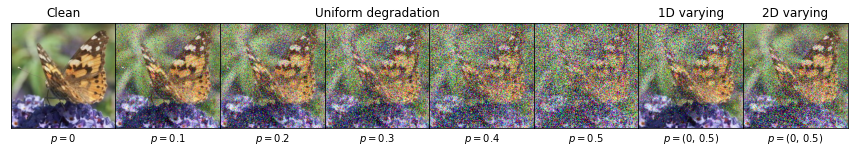

In [5]:
from degradation import SaltAndPepperNoise

fig, ax = plt.subplots(1, 8, sharey=True, figsize=(15,10/5*4))
# clean images
ax[0].imshow(image.permute(1, 2, 0).cpu().numpy())
ax[0].set_title('Clean')
ax[0].set_xlabel('$p=0$')

# uniform degraded
index = 1
for level in [0.1, 0.2, 0.3, 0.4, 0.5]:
    degraded = SaltAndPepperNoise(level=level, vary='uniform')(image)[0]
    ax[index].imshow(degraded.permute(1, 2, 0).cpu().numpy())
    ax[index].set_xlabel('$p=${}'.format(level))
    index += 1
ax[3].set_title('Uniform degradation')
    
# spatially varying
level = (0, 0.5)
for vary in ['1D', '2D']:
    degraded = SaltAndPepperNoise(level=level, vary=vary)(image)[0]
    ax[index].imshow(degraded.permute(1, 2, 0).cpu().numpy())
    ax[index].set_title('{} varying'.format(vary))
    ax[index].set_xlabel('$p=${}'.format(level))
    index += 1

for i in range(len(ax)):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.subplots_adjust(wspace=0.0) 
plt.show()

## Genearted synthetic images: Gaussian blur

In [ ]:
from degradation import GaussianBlur

fig, ax = plt.subplots(1, 8, sharey=True, figsize=(15,10/5*4))
# clean images
ax[0].imshow(image.permute(1, 2, 0).cpu().numpy())
ax[0].set_title('Clean')
ax[0].set_xlabel('$\sigma=0$')

# uniform degraded
index = 1
for level in [1, 2, 3, 4, 5]:
    degraded = GaussianBlur(level=level, vary='uniform')(image)[0]
    ax[index].imshow(degraded.permute(1, 2, 0).cpu().numpy())
    ax[index].set_xlabel('$\sigma=${}'.format(level))
    index += 1
ax[3].set_title('Uniform degradation')
    
# spatially varying
level = (0, 5)
for vary in ['1D', '2D']:
    degraded = GaussianBlur(level=level, vary=vary)(image)[0]
    ax[index].imshow(degraded.permute(1, 2, 0).cpu().numpy())
    ax[index].set_title('{} varying'.format(vary))
    ax[index].set_xlabel('$\sigma=${}'.format(level))
    index += 1

for i in range(len(ax)):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.subplots_adjust(wspace=0.0) 
plt.show()

## Genearted synthetic images: motion blur

In [ ]:
from degradation import MotionBlur

fig, ax = plt.subplots(1, 8, sharey=True, figsize=(15,10/5*4))
# clean images
ax[0].imshow(image.permute(1, 2, 0).cpu().numpy())
ax[0].set_title('Clean')
ax[0].set_xlabel('$length=1$')

# uniform degraded
index = 1
for level in [5, 9, 13, 17, 21]:
    degraded = MotionBlur(level=level, vary='uniform')(image)[0]
    ax[index].imshow(degraded.permute(1, 2, 0).cpu().numpy())
    ax[index].set_xlabel('$length=${}'.format(level))
    index += 1
ax[3].set_title('Uniform degradation')
    
# spatially varying
level = (1, 21)
for vary in ['1D', '2D']:
    degraded = MotionBlur(level=level, vary=vary)(image)[0]
    ax[index].imshow(degraded.permute(1, 2, 0).cpu().numpy())
    ax[index].set_title('{} varying'.format(vary))
    ax[index].set_xlabel('$length=${}'.format(level))
    index += 1

for i in range(len(ax)):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.subplots_adjust(wspace=0.0) 
plt.show()

## Genearted synthetic images: rectangle crop

In [ ]:
from degradation import RectangleCrop

fig, ax = plt.subplots(1, 8, sharey=True, figsize=(15,10/5*4))
# clean images
ax[0].imshow(image.permute(1, 2, 0).cpu().numpy())
ax[0].set_title('Clean')
ax[0].set_xlabel('$ratio=0$')

# uniform degraded
index = 1
for level in [0.1, 0.2, 0.3, 0.4, 0.5]:
    degraded = RectangleCrop(level=level)(image)[0]
    ax[index].imshow(degraded.permute(1, 2, 0).cpu().numpy())
    ax[index].set_xlabel('$ratio=${}'.format(level))
    index += 1
ax[3].set_title('Uniform degradation')
    

# 1d varying
level = (0, 0.5)
degraded = RectangleCrop(level=level, patch_num=1)(image)[0]
ax[index].imshow(degraded.permute(1, 2, 0).cpu().numpy())
ax[index].set_title('1D varying')
ax[index].set_xlabel('$ratio=${}'.format(level))
index += 1

# 2d varying
degraded = RectangleCrop(level=level, patch_num=(6, 1))(image)[0]
ax[index].imshow(degraded.permute(1, 2, 0).cpu().numpy())
ax[index].set_title('2D varying')
ax[index].set_xlabel('$ratio=${}'.format(level))
index += 1

for i in range(len(ax)):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.subplots_adjust(wspace=0.0) 
plt.show()